In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading File From Google Drive

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/yogaday/yoga2.xlsx"


In [0]:
import pandas as pd

import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
df = pd.read_excel(path)



In [4]:
df.head()

,Text,Polarity
0,Embassy of India in Algeria celebrates 5th Int...,positive
1,Union Home Minister Shri AmitShah will attend ...,neutral
2,International Yoga Day should also be a celebr...,positive
3,"CollaberaGDC\n“Yoga is a light, which once lit...",positive
4,International Day of Yoga event set for Woodlands,neutral


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Polarity_'] = encoder.fit_transform(df.Polarity)

In [70]:
df.head()

,Text,Polarity,Polarity_
0,Embassy of India in Algeria celebrates 5th Int...,positive,2
1,Union Home Minister Shri AmitShah will attend ...,neutral,1
2,International Yoga Day should also be a celebr...,positive,2
3,"CollaberaGDC\n“Yoga is a light, which once lit...",positive,2
4,International Day of Yoga event set for Woodlands,neutral,1


In [72]:
#check and remove duplicate tweets
df.Text.value_counts()
df = df.drop_duplicates(subset='Text', keep='first')
df.Text.value_counts()

 SSPanchakarma: Dear Delhi, don't miss 3 days of Special Ayurveda Therapies to celebrate International Day of Yoga. Yoga, an invalua…                                                                                                                                                                       1
I joined Instagram to follow amandapalmer and I'm overwhelmed. (Also therapist said to find yoga stuff there in session today, soooo....)                                                                                                                                                                   1
Knowing summer vacation is so close, evening walks with the hubby & pups and yoga. NX9UJUv67R                                                                                                                                                                                                               1
International Day Of Yoga 2019...\n\nyoga internationalyoga InternationalDayOfYoga2019 sQxVCet

# One Hot Encoding for target variable

In [73]:
X = df.Text
Y = df.Polarity_
Y= pd.get_dummies(Y)
Y.head()

,0,1,2
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [74]:
import nltk
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

punc = ['.', ',', '"', "'", '?','??', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'???']
    
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

   
  
def tokenize(text):
  wordlist= []
  for word in tokenizer.tokenize(text.lower()):
   
    #word = stemmer.stem(word)
    #nltk.pos_tag(word) wordnet_lemmatizer.lemmatize(word)
    wordlist.append(word)
  return wordlist



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TF-IDF Vectorization

In [0]:
vectorizer = TfidfVectorizer(stop_words = punc, tokenizer = tokenize, max_features = 1000, ngram_range=(1,3), lowercase= True)
tfdf = vectorizer.fit_transform(X)
words = vectorizer.get_feature_names()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( tfdf, Y, test_size=0.2, random_state=42)

In [84]:
X_train.shape

(1698, 1000)

# Multilayer Perceptron

In [91]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
mlp = Sequential()
mlp.add(Dense(1000, input_dim=1000, activation='relu')) #48 columns
mlp.add(Dropout(0.1))
mlp.add(Dense(550, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(150, activation='relu'))
mlp.add(Dropout(0.1))


mlp.add(Dense(150, activation='relu'))
mlp.add(Dropout(0.1))



mlp.add(Dense(10, activation='relu'))
mlp.add(Dropout(0.1))


mlp.add(Dense(3, activation='softmax'))
#best2937 hiddden 200 1
# 82.10 500 550 500 5000 10
# Compile model
from keras import optimizers
opt =optimizers.adamax(lr=0.001)
mlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
import time

start_time = time.clock()


# Fit the model
mlp.fit(X_train, y_train, epochs=15, batch_size=150 )

print (time.clock() - start_time, "seconds")



Epoch 1/15
1698/1698 [==============================] - 3s 2ms/step - loss: 0.9888 - acc: 0.4953
Epoch 2/15
1698/1698 [==============================] - 1s 375us/step - loss: 0.8657 - acc: 0.5559
Epoch 3/15
1698/1698 [==============================] - 1s 390us/step - loss: 0.7831 - acc: 0.6331
Epoch 4/15
1698/1698 [==============================] - 1s 380us/step - loss: 0.6720 - acc: 0.7232
Epoch 5/15
1698/1698 [==============================] - 1s 375us/step - loss: 0.5601 - acc: 0.7756
Epoch 6/15
1698/1698 [==============================] - 1s 372us/step - loss: 0.4540 - acc: 0.8292
Epoch 7/15
1698/1698 [==============================] - 1s 372us/step - loss: 0.3734 - acc: 0.8492
Epoch 8/15
1698/1698 [==============================] - 1s 371us/step - loss: 0.2997 - acc: 0.8804
Epoch 9/15
1698/1698 [==============================] - 1s 371us/step - loss: 0.2377 - acc: 0.9028
Epoch 10/15
1698/1698 [==============================] - 1s 377us/step - loss: 0.2094 - acc: 0.9069
Epoch 11/15

In [92]:
print(mlp.evaluate(X_test, y_test))

425/425 [==============================] - 1s 2ms/step
[1.306125678875867, 0.6682352945383857]


# LSTM Network

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
from sklearn.model_selection import train_test_split

max_fatures = 1000 #or vocab size
tokenizer = Tokenizer(nb_words=max_fatures, split=' ', )
tokenizer.fit_on_texts(X)
X1 = tokenizer.texts_to_sequences(X)
X1 = sequence.pad_sequences(X1, maxlen= max_fatures)
#X1_texts_mat = sequence.pad_sequences(X1, maxlen=max_fatures)

Y1 = (Y).values #pd.get_dummies
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


(1592, 1000) (1592, 3)
(531, 1000) (531, 3)
Found 9826 unique tokens.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [94]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import re

embed_dim = 150
lstm_out = 500

rnn = Sequential()
rnn.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
rnn.add(LSTM(64,  return_sequences = True))
rnn.add(LSTM(64,  return_sequences = False))

#model.add(LSTM(50, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
rnn.add(Dense(3,activation='softmax'))
rnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(rnn.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 150)         150000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1000, 64)          55040     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 195       
Total params: 238,259
Trainable params: 238,259
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
import time

start_time = time.clock()

rnn.fit(X1_train,Y1_train,batch_size=35,epochs=10,verbose=1)
print (time.clock() - start_time, "seconds")


Epoch 1/10
1592/1592 [==============================] - 83s 52ms/step - loss: 0.5484 - acc: 0.7037
Epoch 2/10
1592/1592 [==============================] - 81s 51ms/step - loss: 0.4488 - acc: 0.7703
Epoch 3/10
1592/1592 [==============================] - 81s 51ms/step - loss: 0.3327 - acc: 0.8603
Epoch 4/10
1592/1592 [==============================] - 81s 51ms/step - loss: 0.2404 - acc: 0.9024
Epoch 5/10
1592/1592 [==============================] - 82s 51ms/step - loss: 0.1959 - acc: 0.9269
Epoch 6/10
1592/1592 [==============================] - 81s 51ms/step - loss: 0.1548 - acc: 0.9424
Epoch 7/10
1592/1592 [==============================] - 79s 50ms/step - loss: 0.1375 - acc: 0.9481
Epoch 8/10
1592/1592 [==============================] - 79s 50ms/step - loss: 0.1047 - acc: 0.9671
Epoch 9/10
1592/1592 [==============================] - 79s 50ms/step - loss: 0.0759 - acc: 0.9772
Epoch 10/10
1592/1592 [==============================] - 79s 50ms/step - loss: 0.0691 - acc: 0.9765
1528.8212

In [96]:
print(rnn.evaluate(X1_test,Y1_test))

531/531 [==============================] - 6s 11ms/step
[1.0008489886919658, 0.7740113033637713]


#Convolutional Neural Network

In [97]:

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
embed_dim = 150
lstm_out = 500
cnn = Sequential()
cnn.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
cnn.add(Conv1D(64, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
cnn.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
cnn.add(Conv1D(64, 2, activation='relu'))
cnn.add(MaxPooling1D(pool_size=4))
cnn.add(LSTM(64,  return_sequences = False))
cnn.add(Dense(3,activation='softmax'))
cnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(cnn.summary()) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 150)         150000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 996, 64)           48064     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 249, 64)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 248, 64)           8256      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 195       
Total para

In [98]:
import time

start_time = time.clock()

cnn.fit(X1_train,Y1_train,batch_size=35,epochs=10,verbose=1)
print (time.clock() - start_time, "seconds")


Epoch 1/10
1592/1592 [==============================] - 20s 13ms/step - loss: 0.5500 - acc: 0.6981
Epoch 2/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.4830 - acc: 0.7741
Epoch 3/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.3589 - acc: 0.8476
Epoch 4/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.2338 - acc: 0.9116
Epoch 5/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.1705 - acc: 0.9286
Epoch 6/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.1020 - acc: 0.9644
Epoch 7/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.0576 - acc: 0.9841
Epoch 8/10
1592/1592 [==============================] - 17s 10ms/step - loss: 0.0386 - acc: 0.9895
Epoch 9/10
1592/1592 [==============================] - 17s 10ms/step - loss: 0.0274 - acc: 0.9929
Epoch 10/10
1592/1592 [==============================] - 17s 11ms/step - loss: 0.0219 - acc: 0.9939
324.94169

In [99]:
print(cnn.evaluate(X1_test,Y1_test))


531/531 [==============================] - 2s 5ms/step
[0.9235777946964271, 0.7903327124715974]


In [100]:
ACC_MLP =mlp.evaluate(X_test, y_test)[1]
ACC_RNN =rnn.evaluate(X1_test,Y1_test)[1]
ACC_CNN =cnn.evaluate(X1_test,Y1_test)[1]

531/531 [==============================] - 1s 3ms/step


[0.6682352945383857, 0.7740113033637713, 0.7903327124715974]


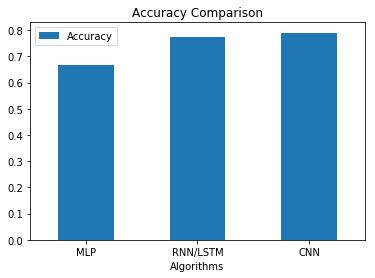

In [101]:
import matplotlib.pyplot as plt
results = [ACC_MLP, ACC_RNN, ACC_CNN]
print(results)
df_acc = pd.DataFrame({'Algorithms':['MLP', 'RNN/LSTM', 'CNN'], 'Accuracy':[ACC_MLP, ACC_RNN, ACC_CNN]})
ax = df_acc.plot.bar(x='Algorithms', rot=0, )

ax.set_title ("Accuracy Comparison")
plt.show()